In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

import random

In [114]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Define Best Parameters for Each Algorithm

### FourPeaks - Highlights Strength of GA

In [115]:
LENGTHS = [20, 40, 60, 80, 100, 120]

bf1_rhc_list = []
bf1_sa_list = []
bf1_ga_list = []
bf1_mim_list = []

rhc_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
sa_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
ga_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
mimic_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict1['lengths'].append(length)
    sa_dict1['lengths'].append(length)
    ga_dict1['lengths'].append(length)
    mimic_dict1['lengths'].append(length)
    
    # Step 1
    fitness1 = mlrose.FourPeaks(t_pct=0.1)
    
    # Step 2
    problem1 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness1, maximize = True, max_val = 2)

    # Step 3 
    # RHC 
    start = time.time()
    bs1_rhc, bf1_rhc, curve1_rhc = mlrose.random_hill_climb(problem = problem1, 
                                               max_attempts = 1000, max_iters = 1000, 
                                               restarts = int(.50*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict1['runtime'].append(end_rhc-start)
    rhc_dict1['best_fits'].append(bf1_rhc)
    rhc_dict1['fit_curves'].append(curve1_rhc)
    print("...Finished RHC in "+str(end_rhc-start))
    # SA 
    bs1_sa, bf1_sa, curve1_sa = mlrose.simulated_annealing(problem=problem1, 
                                               max_attempts=10, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict1['runtime'].append(end_sa-end_rhc)
    sa_dict1['best_fits'].append(bf1_sa)
    sa_dict1['fit_curves'].append(curve1_sa)
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs1_ga, bf1_ga, curve1_ga = mlrose.genetic_alg(problem=problem1, 
                                               pop_size = int(5*length), mutation_prob = 0.10,
                                               max_attempts=1000, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict1['runtime'].append(end_ga-end_sa)
    ga_dict1['best_fits'].append(bf1_ga)
    ga_dict1['fit_curves'].append(curve1_ga)
    print("...Finished GA in "+ str(end_ga-end_sa))
    
    # MIMIC 
    bs1_mim, bf1_mim, curve1_mim = mlrose.mimic(problem=problem1, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
     
    end_mimic = time.time()
    mimic_dict1['runtime'].append(end_mimic-end_ga)
    mimic_dict1['best_fits'].append(bf1_mim)
    mimic_dict1['fit_curves'].append(curve1_mim)
    print("...Finished MIMIC in "+ str(end_mimic-end_ga))
    
    bf1_rhc_list.append(bf1_rhc)
    bf1_sa_list.append(bf1_sa)
    bf1_ga_list.append(bf1_ga)
    bf1_mim_list.append(bf1_mim)
    

print(bf1_rhc_list)
print(bf1_sa_list)
print(bf1_ga_list)
print(bf1_mim_list)

Trying Input Length 20
...Finished RHC in 0.18235111236572266
...Finished SA in 0.0027379989624023438
...Finished GA in 0.5937478542327881
...Finished MIMIC in 2.1878411769866943
Trying Input Length 40
...Finished RHC in 0.355571985244751
...Finished SA in 0.012552976608276367
...Finished GA in 1.1507339477539062
...Finished MIMIC in 9.596315860748291
Trying Input Length 60
...Finished RHC in 0.514570951461792
...Finished SA in 0.02035999298095703


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 1.8936829566955566
...Finished MIMIC in 39.08250403404236
Trying Input Length 80
...Finished RHC in 0.6785109043121338
...Finished SA in 0.029362201690673828


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.73838472366333
...Finished MIMIC in 82.67671203613281
Trying Input Length 100
...Finished RHC in 0.8043289184570312
...Finished SA in 0.029754161834716797


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.7159857749938965
...Finished MIMIC in 87.15370917320251
Trying Input Length 120
...Finished RHC in 0.9403841495513916
...Finished SA in 0.02812480926513672


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 4.650873899459839
...Finished MIMIC in 150.84881830215454
[37.0, 40.0, 103.0, 48.0, 42.0, 34.0]
[37.0, 64.0, 94.0, 23.0, 32.0, 19.0]
[35.0, 60.0, 80.0, 104.0, 122.0, 136.0]
[37.0, 59.0, 79.0, 112.0, 115.0, 28.0]


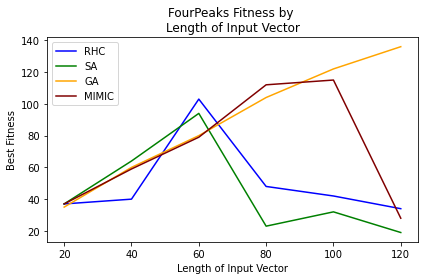

In [116]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FourPeaks Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Fitness.png")
plt.show()

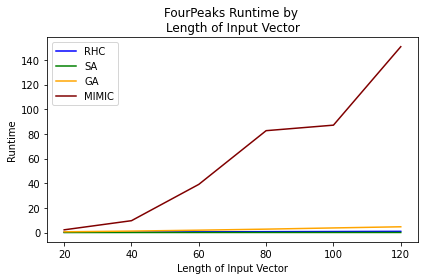

In [117]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FourPeaks Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Runtime.png")
plt.show()

### FlipFlop - Highlights Strength of SA

In [118]:
LENGTHS = [20, 40, 60, 80, 100, 120]

bf2_rhc_list = []
bf2_sa_list = []
bf2_ga_list = []
bf2_mim_list = []

rhc_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
sa_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
ga_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
mimic_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    
    print("Trying Input Length", str(length))
    
    rhc_dict2['lengths'].append(length)
    sa_dict2['lengths'].append(length)
    ga_dict2['lengths'].append(length)
    mimic_dict2['lengths'].append(length)
    
    # Step 1
    fitness2 = mlrose.FlipFlop()
    
    # Step 2
    problem2 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness2, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs2_rhc, bf2_rhc, curve2_rhc = mlrose.random_hill_climb(problem = problem2, 
                                               max_attempts = 1000, max_iters = 100, 
                                               restarts = int(1.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict2['runtime'].append(end_rhc-start)
    rhc_dict2['best_fits'].append(bf2_rhc)
    rhc_dict2['fit_curves'].append(curve2_rhc)
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs2_sa, bf2_sa, curve2_sa = mlrose.simulated_annealing(problem=problem2, 
                                               max_attempts=100, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict2['runtime'].append(end_sa-end_rhc)
    sa_dict2['best_fits'].append(bf2_sa)
    sa_dict2['fit_curves'].append(curve2_sa)
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs2_ga, bf2_ga, curve2_ga = mlrose.genetic_alg(problem=problem2, 
                                               pop_size = int(2*length), mutation_prob = 0.20,
                                               max_attempts=1000, max_iters = 10,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict2['runtime'].append(end_ga-end_sa)
    ga_dict2['best_fits'].append(bf2_ga)
    ga_dict2['fit_curves'].append(curve2_ga)
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs2_mim, bf2_mim, curve2_mim = mlrose.mimic(problem=problem2, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    
    end_mimic = time.time()
    mimic_dict2['runtime'].append(end_mimic-end_ga)
    mimic_dict2['best_fits'].append(bf2_mim)
    mimic_dict2['fit_curves'].append(curve2_mim)
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf2_rhc_list.append(bf2_rhc)
    bf2_sa_list.append(bf2_sa)
    bf2_ga_list.append(bf2_ga)
    bf2_mim_list.append(bf2_mim)
    

print(bf2_rhc_list)
print(bf2_sa_list)
print(bf2_ga_list)
print(bf2_mim_list)

Trying Input Length 20
...Finished RHC in 0.032814979553222656
...Finished SA in 0.0038728713989257812
...Finished GA in 0.028484106063842773
...Finished MIMIC in 2.010038137435913
Trying Input Length 40
...Finished RHC in 0.08586311340332031
...Finished SA in 0.02737903594970703
...Finished GA in 0.06411385536193848


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 10.66156792640686
Trying Input Length 60
...Finished RHC in 0.16383981704711914
...Finished SA in 0.03276801109313965
...Finished GA in 0.10642218589782715
...Finished MIMIC in 28.58409285545349
Trying Input Length 80
...Finished RHC in 0.26581311225891113
...Finished SA in 0.04026174545288086
...Finished GA in 0.16584300994873047


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 53.118115186691284
Trying Input Length 100
...Finished RHC in 0.4001941680908203
...Finished SA in 0.0465090274810791


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.2393937110900879
...Finished MIMIC in 92.97168207168579
Trying Input Length 120
...Finished RHC in 0.5402147769927979
...Finished SA in 0.05433917045593262


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.3451271057128906
...Finished MIMIC in 170.9201319217682
[18.0, 37.0, 54.0, 67.0, 81.0, 98.0]
[19.0, 38.0, 54.0, 76.0, 92.0, 108.0]
[16.0, 30.0, 42.0, 55.0, 69.0, 79.0]
[19.0, 38.0, 55.0, 75.0, 93.0, 113.0]


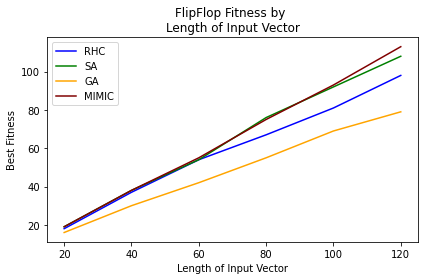

In [119]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FlipFlop Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Fitness.png")
plt.show()

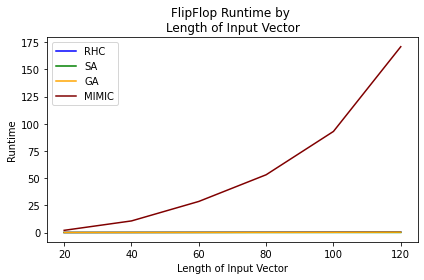

In [120]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FlipFlop Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Runtime.png")
plt.show()

### Knapsack

In [121]:
LENGTHS = [20, 40, 60, 80, 100, 120]

bf3_rhc_list = []
bf3_sa_list = []
bf3_ga_list = []
bf3_mim_list = []

rhc_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
sa_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
ga_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
mimic_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []
            #,'num_evals_to_best': []
              }

for i in range(0, len(LENGTHS)):
   
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict3['lengths'].append(length)
    sa_dict3['lengths'].append(length)
    ga_dict3['lengths'].append(length)
    mimic_dict3['lengths'].append(length)
    
    # Step 1
    random.seed(42)
    weights = []
    values = []

    for i in range(length):    
        weights.append(random.randint(1, 100))
        values.append(random.randint(1, 100))
        
    fitness3 = mlrose.Knapsack(weights=weights, values=values, max_weight_pct = 0.35)
    
    # Step 2
    problem3 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness3, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs3_rhc, bf3_rhc, curve3_rhc = mlrose.random_hill_climb(problem = problem3, 
                                               max_attempts = 100, max_iters = 1000, 
                                               restarts = int(2.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict3['runtime'].append(end_rhc-start)
    rhc_dict3['best_fits'].append(bf3_rhc)
    rhc_dict3['fit_curves'].append(curve3_rhc)
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs3_sa, bf3_sa, curve3_sa = mlrose.simulated_annealing(problem=problem3, 
                                               max_attempts=1000, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict3['runtime'].append(end_sa-end_rhc)
    sa_dict3['best_fits'].append(bf3_sa)
    sa_dict3['fit_curves'].append(curve3_sa)
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs3_ga, bf3_ga, curve3_ga = mlrose.genetic_alg(problem=problem3, 
                                               pop_size = int(5*length), mutation_prob = 0.20,
                                               max_attempts=100, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict3['runtime'].append(end_ga-end_sa)
    ga_dict3['best_fits'].append(bf3_ga)
    ga_dict3['fit_curves'].append(curve3_ga)
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs3_mim, bf3_mim, curve3_mim = mlrose.mimic(problem=problem3, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    
    end_mimic = time.time()
    mimic_dict3['runtime'].append(end_mimic-end_ga)
    mimic_dict3['best_fits'].append(bf3_mim)
    mimic_dict3['fit_curves'].append(curve3_mim)
    
    #arr1 = bf3_mim.tolist()
    #print(arr1)
    #arr2 = list(curve3_ga)
    #print(arr2)
    #num_evals = arr2.index(arr1) + 1
    #print(num_evals)
    #mimic_dict3['num_evals_to_best'] = num_evals
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf3_rhc_list.append(bf3_rhc)
    bf3_sa_list.append(bf3_sa)
    bf3_ga_list.append(bf3_ga)
    bf3_mim_list.append(bf3_mim)
    

print(bf3_rhc_list)
print(bf3_sa_list)
print(bf3_ga_list)
print(bf3_mim_list)

Trying Input Length 20
...Finished RHC in 0.12201213836669922
...Finished SA in 0.034230947494506836
...Finished GA in 0.6942217350006104
...Finished MIMIC in 2.8296101093292236
Trying Input Length 40
...Finished RHC in 0.2501187324523926
...Finished SA in 0.03761005401611328


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 1.527771234512329
...Finished MIMIC in 8.320228815078735
Trying Input Length 60
...Finished RHC in 0.37855100631713867
...Finished SA in 0.044547080993652344


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.5684280395507812
...Finished MIMIC in 43.51320505142212
Trying Input Length 80
...Finished RHC in 0.5319819450378418
...Finished SA in 0.05266213417053223


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.8479387760162354
...Finished MIMIC in 26.403215169906616
Trying Input Length 100
...Finished RHC in 0.7093818187713623
...Finished SA in 0.061370134353637695


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 5.305761098861694
...Finished MIMIC in 38.44133281707764
Trying Input Length 120
...Finished RHC in 0.914452075958252
...Finished SA in 0.07050967216491699
...Finished GA in 6.981284141540527
...Finished MIMIC in 303.6042711734772
[409.0, 953.0, 1396.0, 1759.0, 2392.0, 2669.0]
[390.0, 679.0, 1201.0, 1624.0, 2239.0, 0.0]
[507.0, 1103.0, 1633.0, 2124.0, 2741.0, 3276.0]
[438.0, 970.0, 1512.0, 1984.0, 2497.0, 3126.0]


In [122]:
mimic_dict3

{'lengths': [20, 40, 60, 80, 100, 120],
 'best_fits': [438.0, 970.0, 1512.0, 1984.0, 2497.0, 3126.0],
 'runtime': [2.8296101093292236,
  8.320228815078735,
  43.51320505142212,
  26.403215169906616,
  38.44133281707764,
  303.6042711734772],
 'fit_curves': [array([386., 386., 386., 386., 389., 389., 389., 389., 389., 389., 389.,
         389., 438., 438., 438., 438., 438., 438., 438., 438., 438., 438.,
         438.]),
  array([818., 818., 818., 880., 880., 929., 970., 970., 970., 970., 970.,
         970., 970., 970., 970., 970., 970.]),
  array([1357., 1357., 1357., 1357., 1357., 1357., 1357., 1357., 1357.,
         1375., 1375., 1375., 1375., 1375., 1375., 1375., 1375., 1397.,
         1397., 1397., 1397., 1397., 1397., 1397., 1397., 1397., 1397.,
         1492., 1512., 1512., 1512., 1512., 1512., 1512., 1512., 1512.,
         1512., 1512., 1512.]),
  array([1838., 1838., 1984., 1984., 1984., 1984., 1984., 1984., 1984.,
         1984., 1984., 1984., 1984.]),
  array([   0., 2497., 2

In [123]:
for i in range(0, len(LENGTHS)):
    #print(i)
    #print(mimic_dict3['best_fits'][i])
    arr1 = mimic_dict3['best_fits'][i].tolist()

    #print(mimic_dict3['fit_curves'][i])
    arr2 = list(mimic_dict3['fit_curves'][i])

    num_evals = arr2.index(arr1) + 1
    print(num_evals)

13
7
29
3
2
15


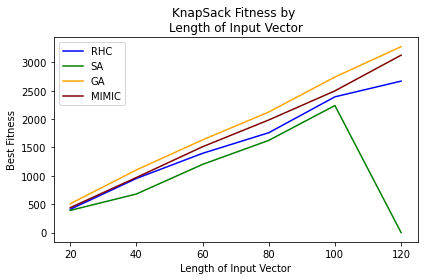

In [124]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("KnapSack Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KnapSack_Fitness.png")
plt.show()

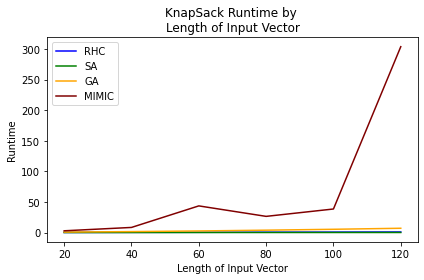

In [125]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['runtime'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("KnapSack Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_Runtime_Fitness.png")
plt.show()